In [38]:
import numpy as np
import os
from scipy import signal
import matplotlib.pyplot as plt
import scipy
from six.moves import xrange

In [35]:
from __future__ import print_function

In [2]:
arr = np.array([np.random.randint(1,10) for i in range(10)])
arr

array([7, 7, 4, 3, 1, 8, 2, 5, 2, 8])

In [3]:
idxs = np.arange(arr.shape[0])
idxs

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
idx = np.argmax(arr)
idx

5

In [5]:
arr2 = arr[idxs != idx]
print(arr2)
np.argmax(arr2)

[7 7 4 3 1 2 5 2 8]


8

In [6]:
np.argsort(arr)

array([4, 6, 8, 3, 2, 7, 0, 1, 5, 9])

In [7]:
import pydub


In [8]:
import pyaudio

In [36]:
pa = pyaudio.PyAudio()
pa.get_default_input_device_info()

{'index': 5,
 'structVersion': 2,
 'name': 'default',
 'hostApi': 0,
 'maxInputChannels': 32,
 'maxOutputChannels': 32,
 'defaultLowInputLatency': 0.008707482993197279,
 'defaultLowOutputLatency': 0.008707482993197279,
 'defaultHighInputLatency': 0.034829931972789115,
 'defaultHighOutputLatency': 0.034829931972789115,
 'defaultSampleRate': 44100.0}

In [37]:
import wave
import sys
from array import array

In [10]:
fname = './start.wav'

In [11]:
import IPython.display as ipd

In [12]:
import scipy.signal as sg

In [13]:
from scipy.io import wavfile
import time

In [14]:
fr, data = scipy.io.wavfile.read(fname)
fr, data.shape

(16000, (17616,))

In [15]:
ipd.Audio(data=data, rate=fr, autoplay = True)

In [16]:
def plot_s(data_list):
    
    fig, ax = plt.subplots(len(data_list), 1,  figsize = (8, 16))
    for i, data in enumerate(data_list):
        t = np.linspace(0., data.shape[0]/fr, data.shape[0])
        title = 'max: '+ str(np.round(data.max(), 2))+ ' min: ' +str(np.round(data.min(), 2)) + ' mean: '+ str(data.mean())
        ax[i].plot(t, data, lw = 1)
        ax[i].set_title(label = title)
        

#
#fr, data = scipy.io.wavfile.read(fname)
s_time = time.time()
b, a = scipy.signal.butter(N=4,Wn= 1000.0/fr/2., btype='lowpass' )
data_l = sg.lfilter(a=a, b = b, x=data)
e_time = time.time()
print('for low pass: ', (e_time - s_time) * 1000)

#
#fr, data = scipy.io.wavfile.read(fname)
s_time = time.time()
b, a = scipy.signal.butter(N=4,Wn= 1000.0/fr/2., btype='highpass' )
data_h = sg.lfilter(a=a, b = b, x=data)
e_time = time.time()
print('for high pass: ', (e_time - s_time) * 1000)

In [25]:

fr, data = scipy.io.wavfile.read(fname)
s_time = time.time()
b, a = scipy.signal.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
data_bl = sg.lfilter(a=a, b = b, x=data)
e_time = time.time()
print('for band pass: ', (e_time - s_time) * 1000)
                           

for band pass:  2.928018569946289


In [26]:

fr, data = scipy.io.wavfile.read(fname)
s_time = time.time()
b, a = scipy.signal.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
data_bf = sg.filtfilt(a=a, b = b, x=data)
e_time = time.time()
print('for band pass: ', (e_time - s_time) * 1000)

for band pass:  3.2956600189208984


/home/crl/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


#
fr, data = scipy.io.wavfile.read(fname)
s_time = time.time()
b, a = scipy.signal.butter(N=3,Wn= (2 * 300/16000.0,2 * 3400/16000.0 ), btype='bandpass' )
data_b = sg.filtfilt(a=a, b = b, x=data)
e_time = time.time()
print('for band pass: ', (e_time - s_time) * 1000)
                           

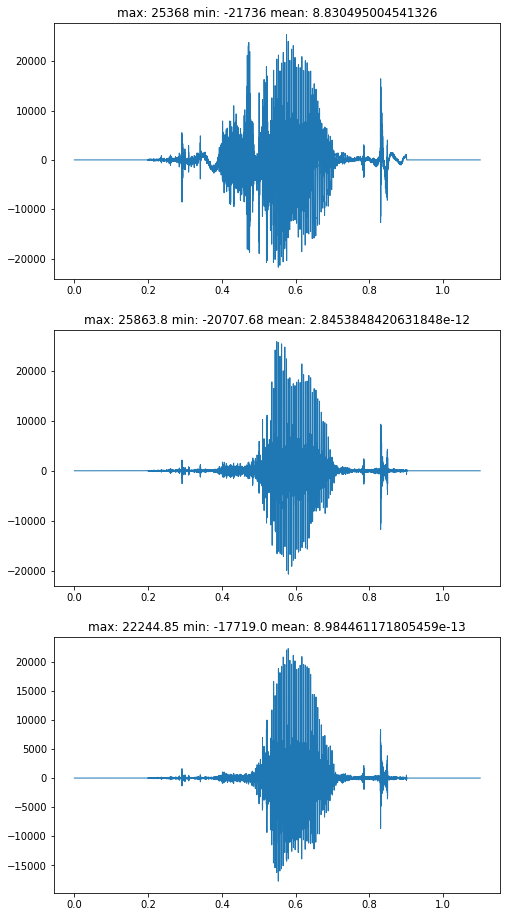

In [27]:
#data_list = [data, data_l, data_h, data_b]
data_list = [data, data_bl, data_bf]
plot_s(data_list)


In [34]:
for data in data_list[1:]:
    s_ = ipd.Audio(data, rate = fr, autoplay=True)
    ipd.display(s_)
    time.sleep(2)
    ipd.clear_output()